In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from keras.models  import Sequential
from keras.layers import Input, Dense
from keras.optimizers import Adam, SGD, RMSprop
import matplotlib.pyplot as plt
from keras.models import load_model

In [2]:
df=pd.read_csv("Distance_file_2.csv")

X = df[['m','c1','c2']]
y = df['Distance']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=0)

model_2 = Sequential([
    Dense(3, input_shape=(3,), activation="relu"),
    Dense(1,activation='linear')
])

model_2.summary()

model_2.compile(loss='mean_squared_error', optimizer='adam')
run_hist_2 = model_2.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=150)

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 3)                 12        
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 4         
Total params: 16
Trainable params: 16
Non-trainable params: 0
_________________________________________________________________
Epoch 1/150
24/24 [==============================] - 1s 25ms/step - loss: 95.8347 - val_loss: 98.0769
Epoch 2/150
24/24 [==============================] - 0s 7ms/step - loss: 87.7513 - val_loss: 90.1282
Epoch 3/150
24/24 [==============================] - 0s 7ms/step - loss: 80.3523 - val_loss: 82.6441
Epoch 4/150
24/24 [==============================] - 0s 7ms/step - loss: 73.5021 - val_loss: 75.6471
Epoch 5/150
24/24 [==============================] - 0s 7ms/step - loss: 67.3459 - val_loss: 69.4549
Epoch 6/150
24/2

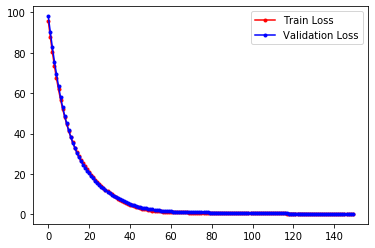

In [3]:
fig, ax = plt.subplots()
ax.plot(run_hist_2.history["loss"],'r', marker='.', label="Train Loss")
ax.plot(run_hist_2.history["val_loss"],'b', marker='.', label="Validation Loss")
ax.legend()

In [4]:
model_2.save('NN_model_2.h5')

In [11]:
import pandas as pd
M=[]
C1=[]
C2=[]
distance=[]

def Distance(m,c1,c2):
    M.append(m)
    C1.append(c1)
    C2.append(c2)

    Data = pd.DataFrame()
    Data['m'] = M
    Data['c1'] = C1
    Data['c2'] = C2

    saved_model = load_model('NN_model_2.h5')
    test_result =saved_model.predict(Data)
    print("Distance between 2 line=",test_result)
    distance.append(test_result)
    Data['Distance'] = distance
    print(Data)

In [12]:
Distance(-4.4,2.4,-5.7)

Distance between 2 line= [[8.477507]]
     m   c1   c2      Distance
0 -4.4  2.4 -5.7  [[8.477507]]
